# Análise Tweets Dengue

In [1]:
# carregando bibliotecas
library("RPostgreSQL")
library("ggplot2")

# configurações PostgreSQL
db_server="kode.ffclrp.usp.br"
db_port="5432"
db_user=""
db_password=""
db_name="twitter"

# carregando configurações PostgreSQL do arquivo
source("conf.R")

# conectando com o banco de dados
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = db_name,
                 host = db_server, port = db_port,
                 user = db_user, password = db_password)

Loading required package: DBI


## Tweets Por Mês

In [2]:
twsMes <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%'" ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [3]:
twsMes

data,tweet
2014-11,1084
2014-12,12581
2015-01,42669
2015-02,86454
2015-03,138819
2015-04,163845
2015-05,161159
2015-06,52782
2015-07,38917
2015-08,27341


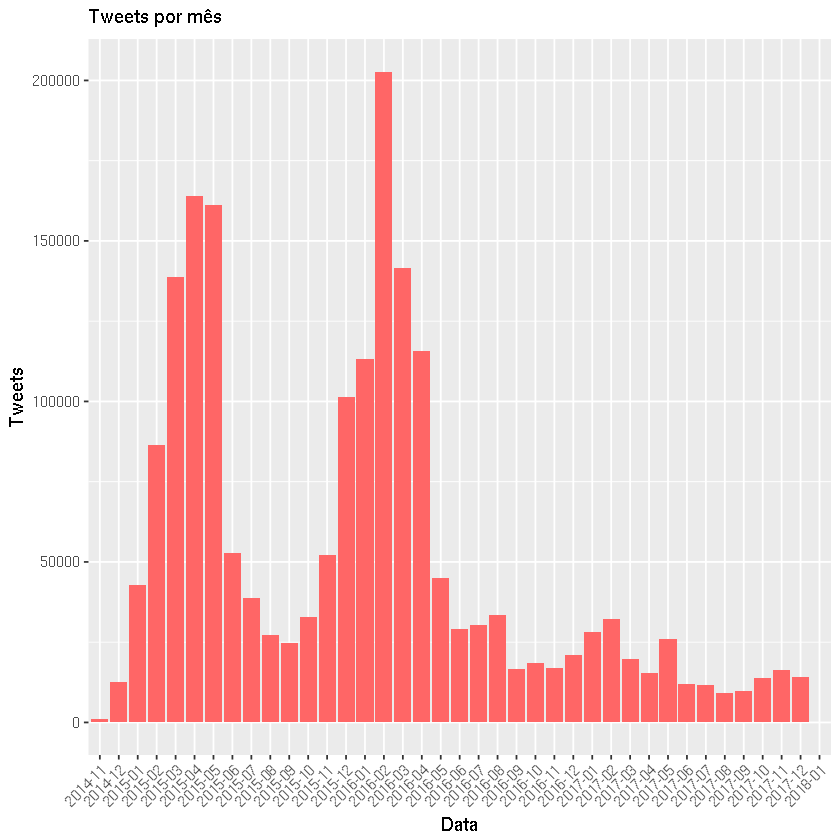

In [4]:
ggplot(data = twsMes, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por mês")

# Tweets Janeiro de 2015

In [5]:
twsJaneiro <- dbGetQuery(con, paste("SELECT ",
                                     "datatweet, ",
                                     "count(codtweet) AS tweet FROM saude ",
                                     "WHERE lower(text) LIKE '%dengue%' ",
                                     "AND datatweet BETWEEN '2015-01-01' AND '2015-01-31' ",
                                     "GROUP BY 1",
                                     "ORDER BY 1"))

In [6]:
twsJaneiro

datatweet,tweet
2015-01-01,258
2015-01-02,670
2015-01-03,882
2015-01-04,593
2015-01-05,533
2015-01-06,825
2015-01-07,1737
2015-01-08,1587
2015-01-09,1295
2015-01-10,1633


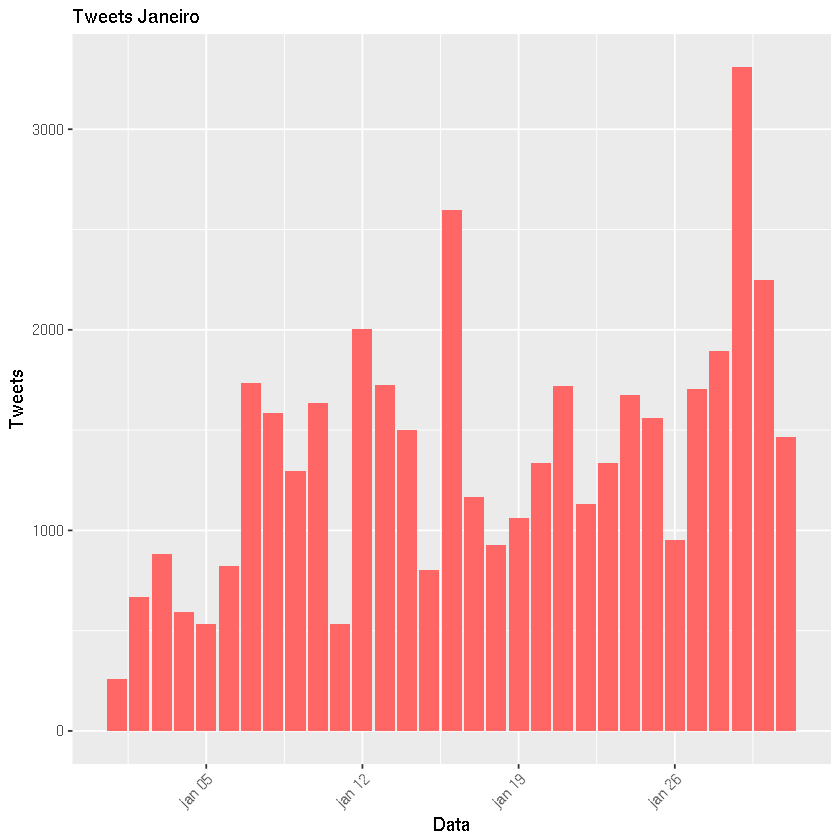

In [7]:
ggplot(data = twsJaneiro, aes(x = datatweet, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = datatweet), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets Janeiro")

## Tweets 2015:

In [8]:
# Running SQL query
all2015 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND datatweet BETWEEN '2015-01-01' AND '2015-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [9]:
all2015

data,tweet
2015-01,42669
2015-02,86454
2015-03,138819
2015-04,163845
2015-05,161159
2015-06,52782
2015-07,38917
2015-08,27341
2015-09,24650
2015-10,32723


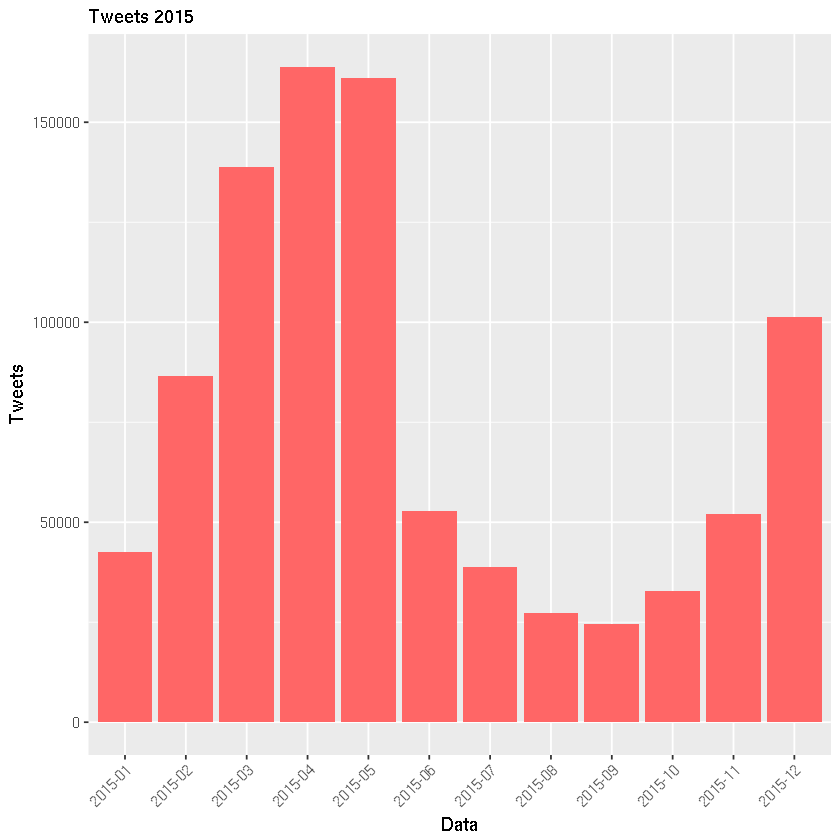

In [10]:
ggplot(data = all2015, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2015")

## Tweets sem RTs:

In [11]:
# Running SQL query
tws2015 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND lower(text) NOT LIKE 'rt%' " ,
                          "AND datatweet BETWEEN '2015-01-01' AND '2015-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [12]:
tws2015

data,tweet
2015-01,34055
2015-02,73055
2015-03,112457
2015-04,117664
2015-05,120168
2015-06,40195
2015-07,29111
2015-08,20821
2015-09,18368
2015-10,24891


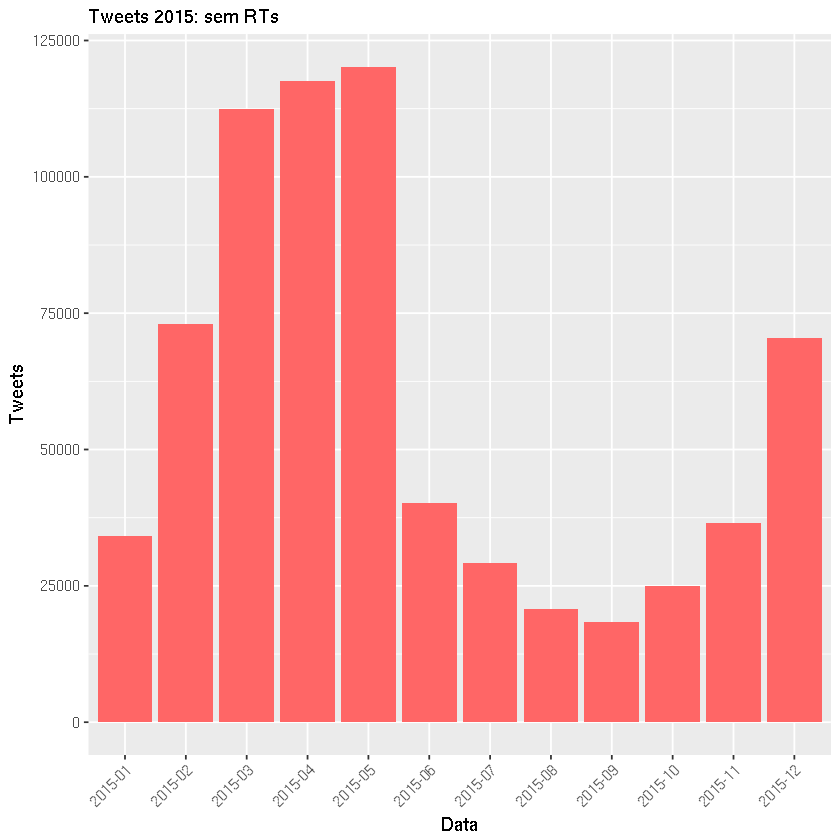

In [13]:
ggplot(data = tws2015, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2015: sem RTs")

## RTs

In [14]:
# Running SQL query
rts2015 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND lower(text) LIKE 'rt%' " ,
                          "AND datatweet BETWEEN '2015-01-01' AND '2015-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [15]:
rts2015

data,tweet
2015-01,8614
2015-02,13399
2015-03,26362
2015-04,46181
2015-05,40991
2015-06,12587
2015-07,9806
2015-08,6520
2015-09,6282
2015-10,7832


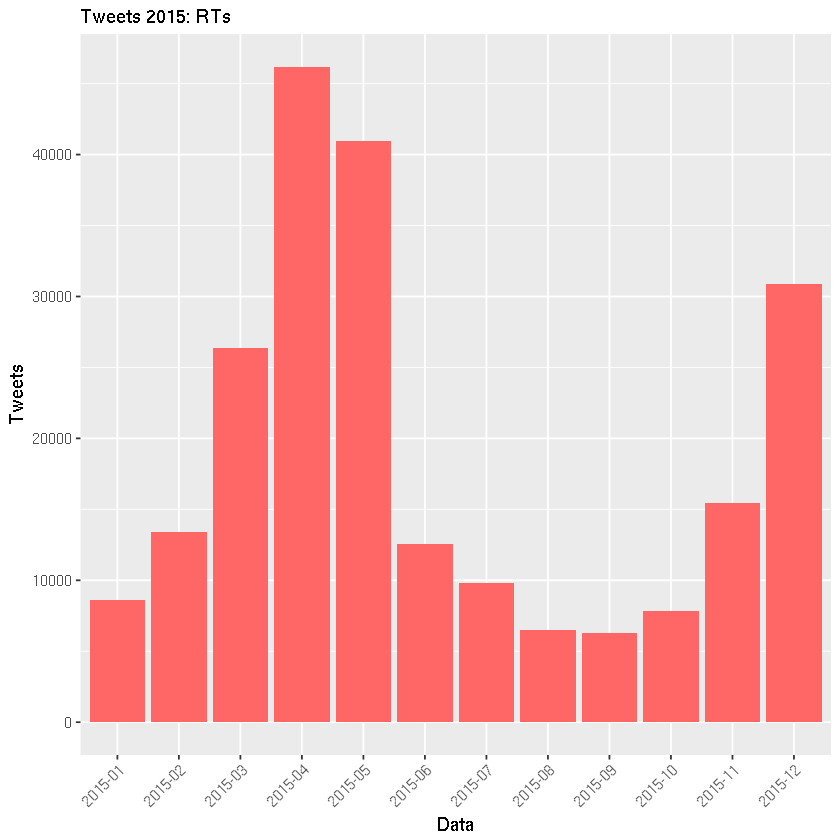

In [16]:
ggplot(data = rts2015, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2015: RTs")

# Tweets 2016:

In [17]:
all2016 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND datatweet BETWEEN '2016-01-01' AND '2016-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [18]:
all2016

data,tweet
2016-01,113365
2016-02,202738
2016-03,141683
2016-04,115606
2016-05,45053
2016-06,29066
2016-07,30212
2016-08,33484
2016-09,16610
2016-10,18664


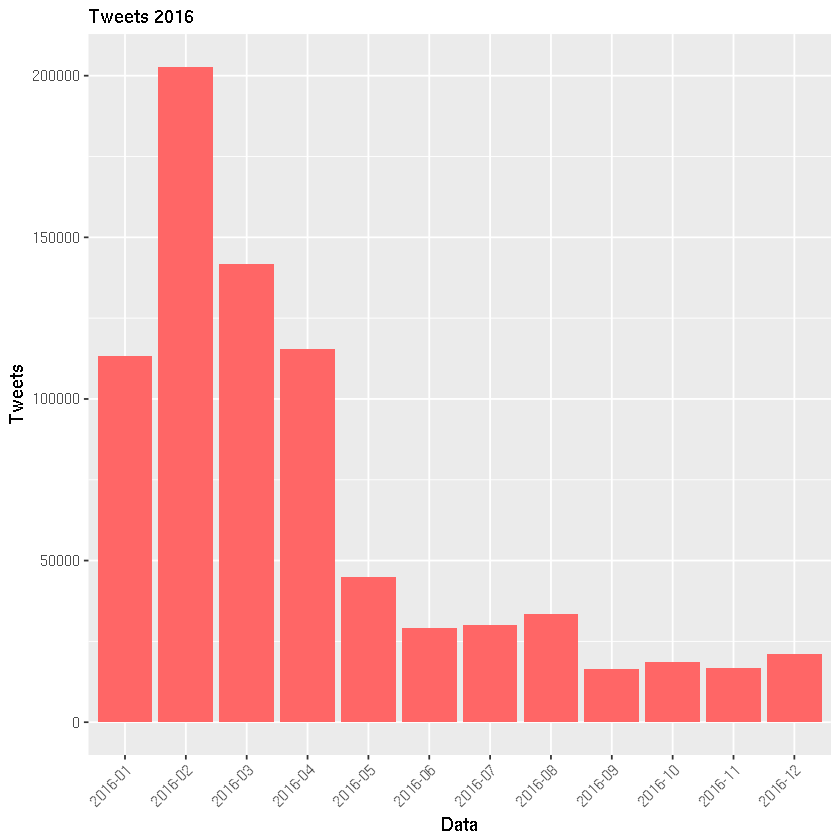

In [19]:
ggplot(data = all2016, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2016")

## Tweets sem RTs:

In [22]:
tws2016 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND lower(text) NOT LIKE 'rt%' " ,
                          "AND datatweet BETWEEN '2016-01-01' AND '2016-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [23]:
tws2016

data,tweet
2016-01,79859
2016-02,131068
2016-03,98508
2016-04,68936
2016-05,33632
2016-06,21033
2016-07,22063
2016-08,16523
2016-09,11716
2016-10,12946


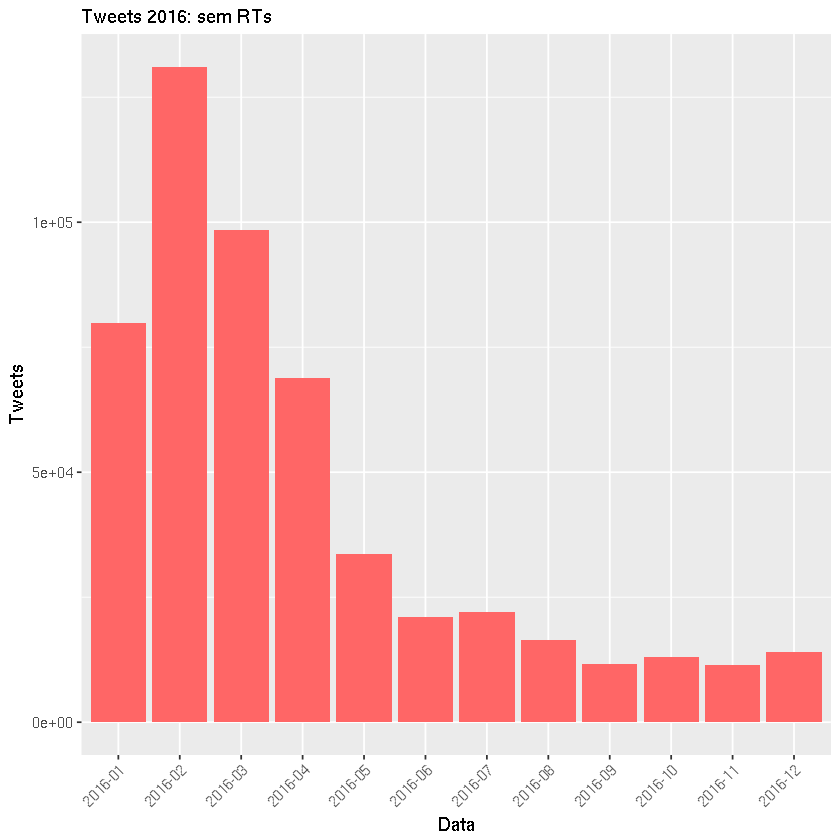

In [24]:
ggplot(data = tws2016, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2016: sem RTs")

## Somente RTs:

In [25]:
rts2016 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND lower(text) LIKE 'rt%' " ,
                          "AND datatweet BETWEEN '2016-01-01' AND '2016-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [26]:
rts2016

data,tweet
2016-01,33506
2016-02,71670
2016-03,43175
2016-04,46670
2016-05,11421
2016-06,8033
2016-07,8149
2016-08,16961
2016-09,4894
2016-10,5718


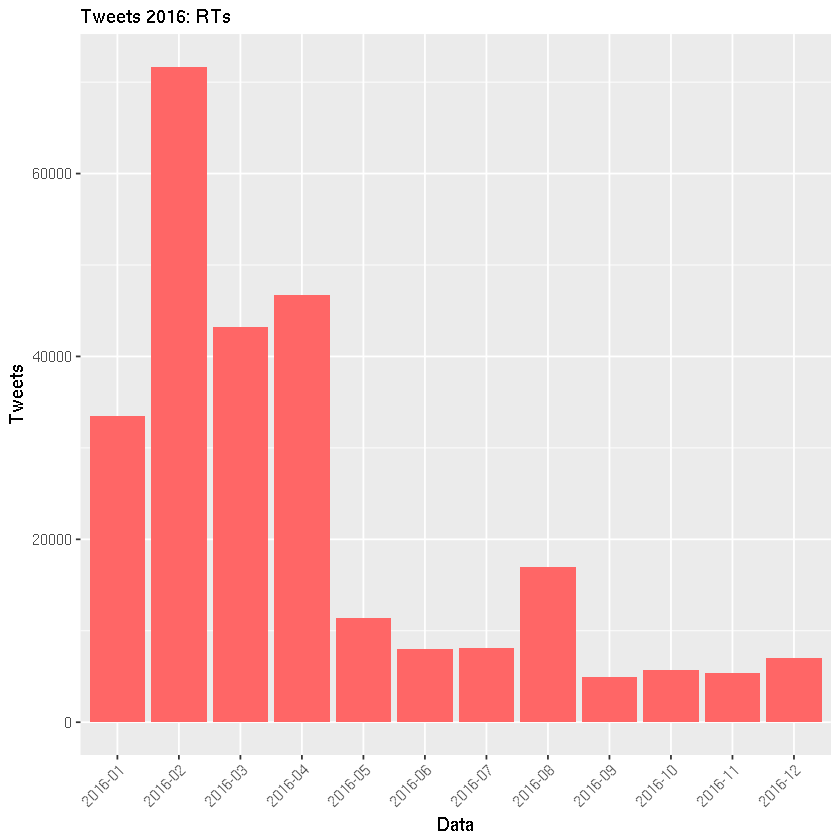

In [27]:
ggplot(data = rts2016, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2016: RTs")

# Tweets 2017:

In [28]:
all2017 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND datatweet BETWEEN '2017-01-01' AND '2017-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [29]:
all2017

data,tweet
2017-01,28217
2017-02,32284
2017-03,19772
2017-04,15405
2017-05,26087
2017-06,12024
2017-07,11639
2017-08,9153
2017-09,9636
2017-10,13944


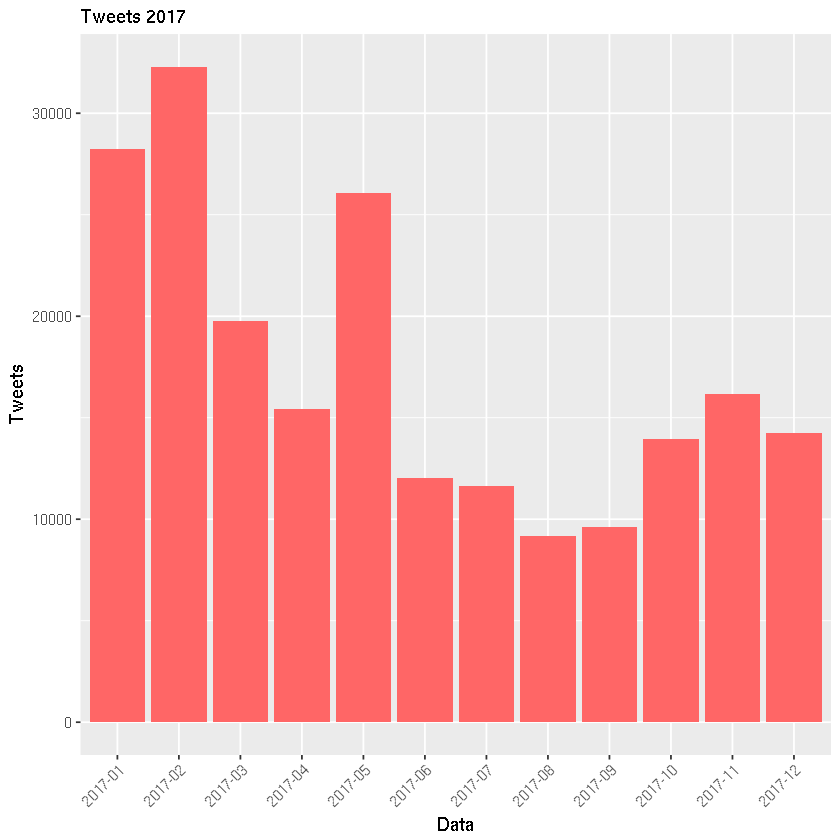

In [30]:
ggplot(data = all2017, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2017")

## Tweets sem RTs:

In [31]:
tws2017 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND lower(text) NOT LIKE 'rt%' " ,
                          "AND datatweet BETWEEN '2017-01-01' AND '2017-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [32]:
tws2017

data,tweet
2017-01,17670
2017-02,12692
2017-03,13628
2017-04,9732
2017-05,8504
2017-06,6739
2017-07,6017
2017-08,5878
2017-09,6381
2017-10,6805


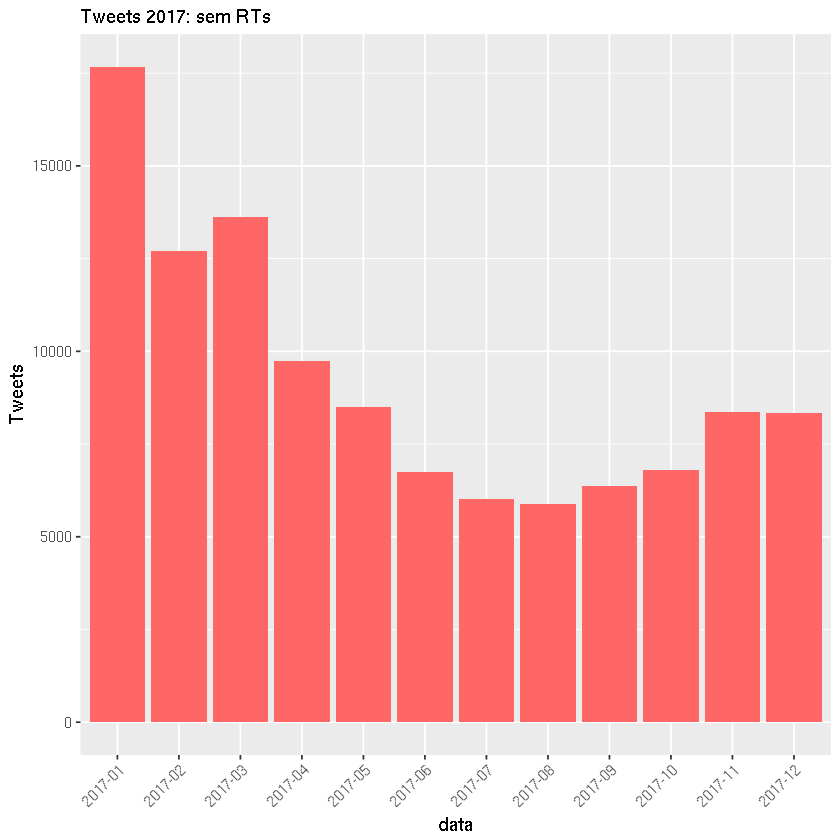

In [33]:
ggplot(data = tws2017, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  ylab("Tweets") + 
  ggtitle("Tweets 2017: sem RTs")

## Somente RTs:

In [34]:
rts2017 <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as data, " ,
                          "count(codtweet) AS tweet FROM saude " ,
                          "WHERE lower(text) LIKE '%dengue%' " ,
                          "AND lower(text) LIKE 'rt%' " ,
                          "AND datatweet BETWEEN '2017-01-01' AND '2017-12-31' ",
                          "GROUP BY 1" ,
                          "ORDER BY 1"))

In [35]:
rts2017

data,tweet
2017-01,10547
2017-02,19592
2017-03,6144
2017-04,5673
2017-05,17583
2017-06,5285
2017-07,5622
2017-08,3275
2017-09,3255
2017-10,7139


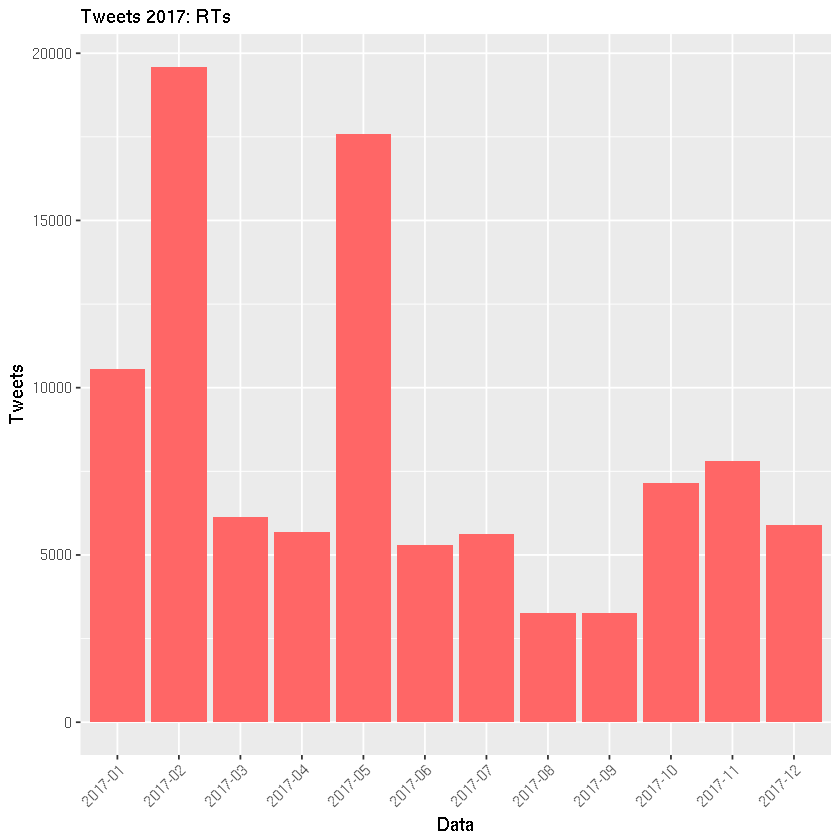

In [37]:
ggplot(data = rts2017, aes(x = data, y = as.numeric(tweet)  )) +
  geom_bar(aes(fill = data), stat = "identity", fill = "#FF6666") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets 2017: RTs")